In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from sklearn import svm

from PIL import Image
from imutils import paths
import numpy as np
import argparse
import os
import pandas as pd

In [2]:
def extract_color_stats(image):
    (R,G,B)=image.split()
    features = [np.mean(R),np.mean(G),np.mean(B),np.std(R),np.std(G),np.std(B)]
    
    return features

In [3]:
models = {
    "knn" : KNeighborsClassifier(n_neighbors=1),
    "naive_bayes" : GaussianNB(),
    "logit" : LogisticRegression(solver="lbfgs", multi_class="auto"),
    "svm" : SVC(kernel="rbf", gamma="auto"),
    "decision_tree" : DecisionTreeClassifier(),
    "random_forest" : RandomForestClassifier(n_estimators=100),
    "mlp" : MLPClassifier()
}

In [4]:
print("[INFO] Extracting image features ...")
#baru = nama datasets
imagePaths = paths.list_images("baru")

data = []
labels = []

for imagePath in imagePaths:
    
    image = Image.open(imagePath)
    features = extract_color_stats(image)
    data.append(features)
    
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

print(features)

[INFO] Extracting image features ...
[100.48789173789174, 100.51524216524217, 96.92749287749288, 42.888386202488505, 43.518223855787575, 40.567656713288414]


In [5]:
#encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.25)
print (labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [49]:
print("[INFO] using '{}'model".format('knn'))
model = models['knn']
#training
model.fit(trainX,trainY)
#X input Y outout
#testing
print("[INFO] evaluating ...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,target_names=le.classes_))

[INFO] using 'knn'model
[INFO] evaluating ...
              precision    recall  f1-score   support

           5       1.00      1.00      1.00        13
           A       0.90      1.00      0.95         9
           B       1.00      1.00      1.00        14
           C       0.93      0.93      0.93        14
       point       1.00      0.92      0.96        13

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



In [52]:
import cv2
import matplotlib.pyplot as plt
image1 = '5-1.jpeg'

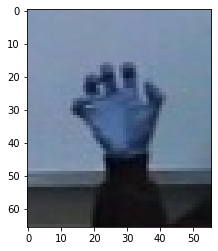

In [53]:
img_array =cv2.imread(image1)
plt.imshow(img_array)
plt.show()

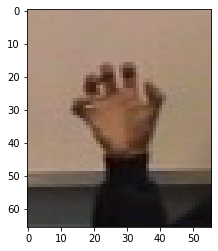

[128.8901515151515, 107.05032467532467, 91.12337662337663, 57.322465908337726, 48.97481639156217, 42.1976312278202]


In [54]:
def extract_color_stats(image):
    (R,G,B)=image.split()
    features = [np.mean(R),np.mean(G),np.mean(B),np.std(R),np.std(G),np.std(B)]
    
    return features

image_testing  = Image.open('5-1.jpeg')
features = extract_color_stats(image_testing)

#image_testing = np.array(features)
#image_testing.shape
plt.imshow(image_testing)
plt.show()
print(features)

In [55]:
image_testing = np.expand_dims(features,0)
print(image_testing)

[[128.89015152 107.05032468  91.12337662  57.32246591  48.97481639
   42.19763123]]


In [56]:
output = model.predict(image_testing)
print(output)

if (output==0):
    print("prediction : 5 (Five)")
if (output==1):
    print("prediction : A")
if (output==2):
    print("prediction : B")
if (output==3):
    print("prediction : C")
if (output==4):
    print("prediction : point")

[0]
prediction : 5 (Five)
